# Julia Basics

Modified from juliabox's tutorial.

Julia is a dynamic language.  You don't need type declarations, and can change variable types dynamically and interactively.

For working with simple numbers, arrays, and strings, its syntax is *superficially* similar to Matlab, Python, and other popular languages.

In order to execute the "In" cells, select the cell and press Shift-Enter, or press the Play button above. To run the entire notebook, navigate to Cell and then click Run All.

The **IJulia notebook** (now called **Jupyter**) can mix code, multimedia results, headings, documentation, equations like $\sqrt{\int x^2 dx}$, and even interactive widgets.

Julia documentation https://docs.julialang.org/en/stable/ is a very useful reference.

I suggest everyone to use the latest version of Julia (current is **v0.6.0**)

Enter the command mode by Esc. Use Esc+h for help.   One useful command is Esc+l, which toggles the **line number**.

In [3]:
A = rand(10,300)

10×300 Array{Float64,2}:
 0.0904394  0.527922   0.0992009  …  0.306172   0.234038  0.889511
 0.616613   0.578396   0.336941      0.288626   0.839689  0.427264
 0.406364   0.536707   0.263         0.241058   0.496856  0.605917
 0.890679   0.942382   0.0365768     0.375107   0.234047  0.148262
 0.94943    0.914677   0.471861      0.410639   0.380409  0.274632
 0.327557   0.0830321  0.952944   …  0.688046   0.420213  0.663691
 0.33211    0.749914   0.13548       0.0626157  0.126894  0.652166
 0.418547   0.319066   0.676142      0.229756   0.55234   0.618058
 0.670377   0.612347   0.770284      0.0622356  0.993233  0.464074
 0.546261   0.446661   0.1774        0.350183   0.58618   0.113193

It has all of the usual built-in Matlab/Numpy-like linear-algebra and vector functions:

In [4]:
b = rand(10) # a random rank-10 vector
x = A \ b    # solve for x satisfying A*x = b; has rank 300
B = A' * A   # A-transpose multiplied by A; is a 300x300 symmetrix matrix with real eigenvalues
eigvals(B)

300-element Array{Float64,1}:
  -3.41761e-13
  -3.01103e-13
  -2.57167e-13
  -2.34631e-13
  -2.10012e-13
  -1.7593e-13 
  -1.28998e-13
  -1.16909e-13
  -9.72018e-14
  -6.64481e-14
  -5.39956e-14
  -4.62723e-14
  -3.9042e-14 
   ⋮          
   3.6927e-13 
   3.74557e-13
  18.4093     
  20.4055     
  20.946      
  22.9226     
  25.3432     
  25.7076     
  27.2965     
  29.6291     
  31.3456     
 794.812      

It also supports convenient vectorisation of functions using the `.` operator:

In [3]:
erf.(eigvals(B)) - 2x.^2 + 4x - 6

300-element Array{Float64,1}:
 -6.02299
 -5.93161
 -5.96133
 -6.0167 
 -5.96599
 -6.05746
 -6.12523
 -5.97322
 -5.99125
 -5.96492
 -6.00245
 -5.95491
 -5.99214
  ⋮      
 -6.03991
 -5.9894 
 -5.04053
 -4.998  
 -5.02277
 -5.06534
 -4.96746
 -4.96039
 -4.98431
 -4.97944
 -5.02127
 -4.95307

Complex numbers and arbitrary-precision arithmetic (via MPFR) are available, of course.

In [4]:
cos(big(3 + 4im))

-2.703494560307422464769480266827091348467753695567661661019265514673434246483996e+01 - 3.851153334811777536563337123053124569704160846091637003157728595256494186490506im

## Unicode

All strings are UTF-8 encoded Unicode by default (UTF-16 and UTF-32 also supported):

In [1]:
matchall(r"\s[a-z]+", "α is a Grëék letter") # regex search of a Unicode string

3-element Array{SubString{String},1}:
 " is"    
 " a"     
 " letter"

Like Python 3, variable names can be Unicode, but Julia allows a somewhat wider range of codepoints in identifiers, which can be typed by LaTeX-like tab-completion *\hat[TAB]\alpha[TAB]*.

In [7]:
̂α= 7
ħ = 6.62606957e-34 / 2π
ẋ = ħ * ̂α

LoadError: [91msyntax: invalid character "̂"[39m

Unlike Python 3, Unicode math operators are parsed as infix operators, which are available for user-defined meanings:

In [7]:
≪(x,y) = x < 0.1*y
50 ≪ 100, 5 ≪ 100, 5 ≤ 50

(false,true,true)

In [8]:
const ⊗ = kron
eye(2,2) ⊗ rand(2,2)

4×4 Array{Float64,2}:
 0.952167   0.253814  0.0        0.0     
 0.0724192  0.902237  0.0        0.0     
 0.0        0.0       0.952167   0.253814
 0.0        0.0       0.0724192  0.902237

## Functions and JIT-compilation

Functions can be defined in several ways, and *don't require type-declarations*.

In [8]:
# verbose form:
function foo(x)
    return x + 1
end

# one-line form:
bar(x) = x + 2
stop

# anonymous function
x -> x + 3

LoadError: [91mUndefVarError: stop not defined[39m

In [10]:
foo(3) # compiles foo for Int arguments

4

In [11]:
foo(7) # re-uses compiled foo(Int)

8

In [12]:
foo(7.3) # compiles a different version for Float64 arguments

8.3

In [13]:
foo([1,2,7,9]) # compiles a different version for Array{Int,1} arguments

4-element Array{Int64,1}:
  2
  3
  8
 10

# Plotting in Julia

We will use the PyPlot package to plot with Julia. This notebook has a few examples to get you started. The [PyPlot.jl](https://github.com/stevengj/PyPlot.jl) site has excellent documentation for plotting.

Loading the PyPlot module may take a few seconds.

In general, all of the arguments, including keyword arguments, are exactly the same as in Python. (With minor translations, of course, e.g. Julia uses `true` and `nothing` instead of Python's `True` and `None`.)

The full matplotlib.pyplot API is far too extensive to describe here; see the [matplotlib.pyplot documentation](http://matplotlib.org/api/pyplot_api.html) for more information. The Matplotlib version number is returned by PyPlot.version.

You need to use **Pkg.add("PyPlot")** the first time to install the package.

Another commonly used one is Gadfly http://gadflyjl.org/stable/

In [2]:
using PyPlot

  likely near In[2]:1


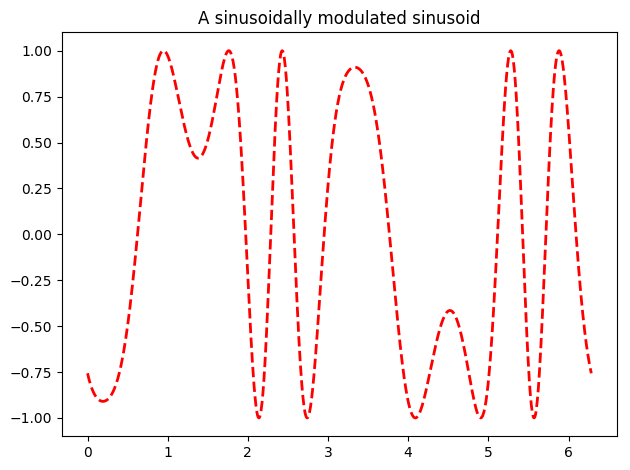

PyObject <matplotlib.text.Text object at 0x7f5b08207590>

In [4]:
x = linspace(0,2*pi,1000); y = sin.(3*x + 4*cos.(2*x));
plot(x, y, color="red", linewidth=2.0, linestyle="--")
title("A sinusoidally modulated sinusoid")

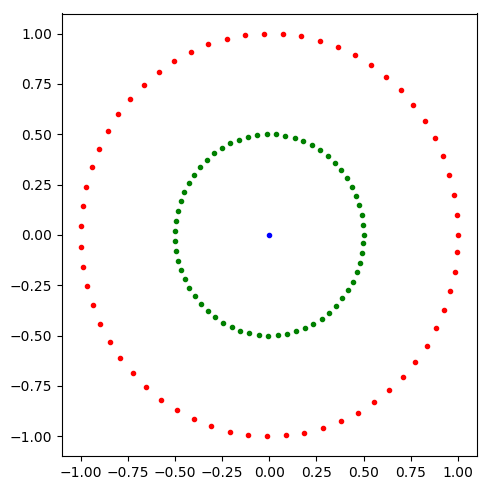

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5b055ddd50>

In [5]:
# Draw (x, y) points
figure(figsize=(5, 5))
θ = collect(0:0.1:2π)
plot(0,0,"b.")
plot(cos.(θ), sin.(θ), "r.")
plot(0.5cos.(θ), 0.5sin.(θ), "g.")

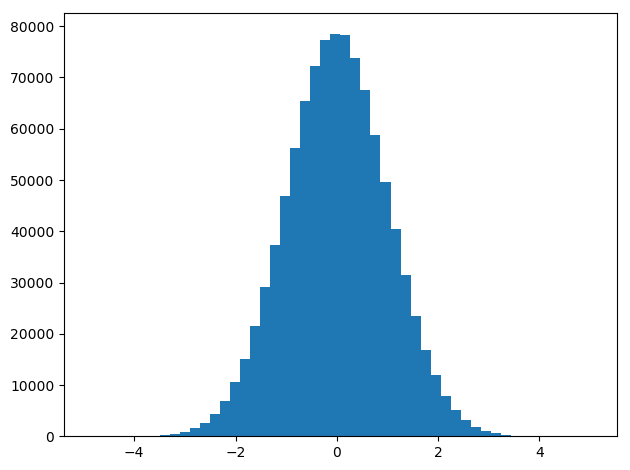

In [7]:
# Draw a histogram

y = randn(10^6)
plt[:hist](y, 50);     # We use plt.hist, because it conflicts with the built-in hist

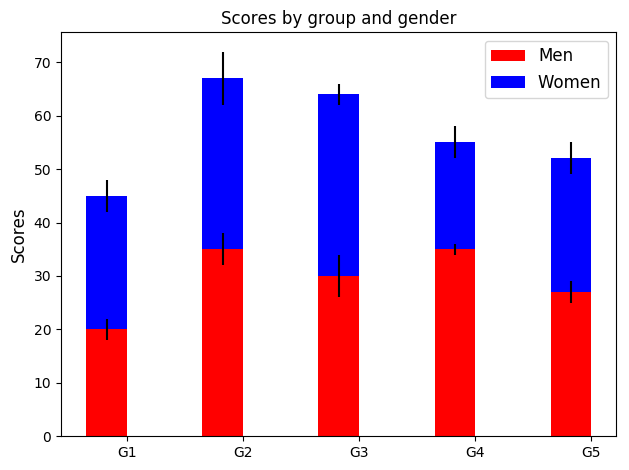

PyObject <matplotlib.legend.Legend object at 0x7f5b051b3810>

In [8]:
# Draw a stacked bar chart

N = 5
menMeans   = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd     = (2, 3, 4, 1, 2)
womenStd   = (3, 5, 2, 3, 3)
ind = 1:N    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = bar(ind, menMeans, width, color="r", yerr=menStd)
p2 = bar(ind, womenMeans, width, bottom=menMeans, color="b", yerr=womenStd)

ylabel("Scores")
title("Scores by group and gender")
xticks(ind+width/2., ("G1", "G2", "G3", "G4", "G5") )
legend( (p1[1], p2[1]), ("Men", "Women") )


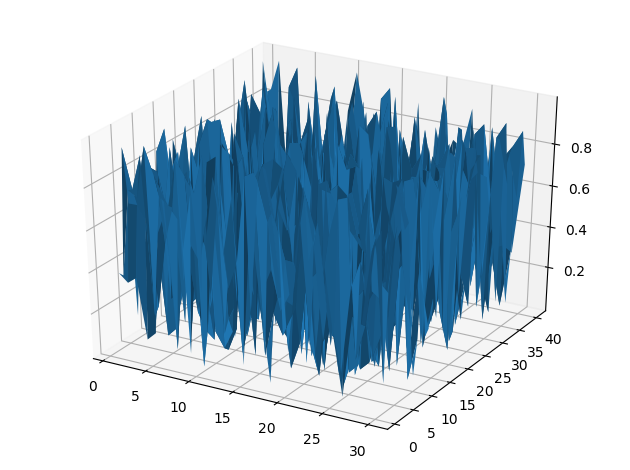

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f5b0509c150>

In [9]:
# Plot a random surface

surf(rand(30,40))